In [2]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np

from collections import defaultdict

In [4]:
import NetCDFDataClean
import model

In [ ]:
outputdf=main("Database files/hb2860_transient_runs.ccsm3_A1B.nc")

In [4]:
group=Dataset('Database files/hb2860_transient_runs.ccsm3_A1B.nc')

In [13]:
clist=makecoordlist(group)
len(clist)

9432

In [15]:
tlist=maketimelist(group)
len(tlist)

54787

In [18]:
group.variables['TIME']

<class 'netCDF4._netCDF4.Variable'>
int32 TIME(TIME)
    units: days since 1950-01-01
    origin: 1950-01-01
    long_name: Time axis
unlimited dimensions: TIME
current shape = (54787,)
filling on, default _FillValue of -2147483647 used

In [20]:
54787/365

2100

In [31]:
waterdf=addwateryear(outputdf[:100])

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [519]:
waterdf['wateryear'][1]=1

waterdf.head(2)


/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,"(48.28125, -122.46875)","(48.28125, -122.40625)","(48.28125, -122.34375)","(48.28125, -122.28125)","(48.28125, -122.21875)","(48.28125, -122.15625)","(48.28125, -122.09375)","(48.28125, -122.03125)","(48.34375, -122.46875)","(48.34375, -122.40625)",...,"(48.65625, -122.03125)","(48.71875, -122.46875)","(48.71875, -122.40625)","(48.71875, -122.34375)","(48.71875, -122.28125)","(48.71875, -122.21875)","(48.71875, -122.15625)","(48.71875, -122.09375)","(48.71875, -122.03125)",wateryear
2032-02-20,NaN,NaN,0.590820,0.679688,0.642578,0.664062,0.784180,0.684570,NaN,0.599609,...,0.836914,1.016602,1.601562,1.802734,2.018555,1.812500,1.041016,0.637695,0.718750,2031
2032-02-21,NaN,NaN,0.755859,0.973633,1.103516,1.208008,1.381836,1.246094,NaN,0.622070,...,0.756836,1.170898,1.354492,1.542969,1.682617,1.594727,0.917969,0.587891,0.663086,1


In [107]:
smallwaterdf=waterdf[:100]
groupdf=waterdf.groupby('wateryear')
maxdf=groupdf.max()
maxdf.index

Int64Index([2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
            2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052,
            2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063,
            2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074,
            2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085,
            2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096,
            2097, 2098, 2099],
           dtype='int64', name='wateryear')

In [315]:

np.array(dfyears)

maxdf[(maxdf.index>2047) & (maxdf.index<=2077)]['(48.71875, -122.09375)']
maxdf.head(2)


,"(48.28125, -122.46875)","(48.28125, -122.40625)","(48.28125, -122.34375)","(48.28125, -122.28125)","(48.28125, -122.21875)","(48.28125, -122.15625)","(48.28125, -122.09375)","(48.28125, -122.03125)","(48.34375, -122.46875)","(48.34375, -122.40625)",...,"(48.65625, -122.09375)","(48.65625, -122.03125)","(48.71875, -122.46875)","(48.71875, -122.40625)","(48.71875, -122.34375)","(48.71875, -122.28125)","(48.71875, -122.21875)","(48.71875, -122.15625)","(48.71875, -122.09375)","(48.71875, -122.03125)"
wateryear,,,,,,,,,,,,,,,,,,,,,
2031,NaN,NaN,5.739258,8.860352,11.040039,12.712891,16.350586,14.495117,NaN,3.999023,...,17.710938,32.461914,5.707031,7.441406,10.27832,17.423828,13.251953,11.031250,15.292969,29.160156
2032,NaN,NaN,11.638672,16.922852,20.873047,23.219727,31.436523,29.726562,NaN,7.208008,...,65.974609,133.994141,23.193359,39.540039,57.09375,111.064453,91.287109,59.831055,55.563477,93.502930


In [277]:
array2077=get_GEV_values(2077,'(48.28125, -122.34375)' , maxdf)
data=np.sort(array2077)[::-1]
rank=np.arange(1,len(data)+1)

n=len(data)

n-rank/(n*(n-1))*data
#sum(n-rank/(n*(n-1))*data)
#n-rank/(n*(n-1))*data

array([ 29.96858275,  29.96320941,  29.94523842,  29.92705639,
        29.90898325,  29.89263874,  29.88153399,  29.88381825,
        29.87988281,  29.87057741,  29.86275929,  29.85486261,
        29.84317641,  29.83194594,  29.83135776,  29.82758621,
        29.82041689,  29.809934  ,  29.80165679,  29.80587733,
        29.79633621,  29.79775054,  29.79263649,  29.79784483,
        29.79074062,  29.79868445,  29.80130657,  29.8123653 ,
        29.82073568,  29.85176455])

In [218]:
np.random.choice(array2077, 4, replace=False)

array([  8.44433594,   5.83007812,  14.72363281,  15.56738281], dtype=float32)

In [10]:
dfexample=pd.read_csv('CCSM3_A1BExample.csv')
dfexample.index=dfexample['wateryear']
dataarray=model.convertfiles_toratios(startyear=2015, coord='(48.71875, -122.09375)', endyear=2030, dfsource=dfexample)

In [17]:
dataarray

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0.05,0.842649,0.833863,0.835441,0.827707,0.827606,0.824705,0.819745,0.835273,0.838906,0.827635,0.834248,0.835513,0.826158,0.824892,0.832277
0.50,0.986467,0.968318,0.974406,0.966150,0.971221,0.960000,0.958260,0.973405,0.985797,0.979336,0.974811,0.981193,0.975487,0.964537,0.970708
0.95,1.159679,1.143459,1.139852,1.125669,1.128663,1.110086,1.106556,1.135745,1.137299,1.150929,1.150052,1.164561,1.139461,1.134364,1.144865


In [216]:
dfmore=pd.concat([dataarray,dataarray**2])
dfmore

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0.05,0.842649,0.833863,0.835441,0.827707,0.827606,0.824705,0.819745,0.835273,0.838906,0.827635,0.834248,0.835513,0.826158,0.824892,0.832277
0.50,0.986467,0.968318,0.974406,0.966150,0.971221,0.960000,0.958260,0.973405,0.985797,0.979336,0.974811,0.981193,0.975487,0.964537,0.970708
0.95,1.159679,1.143459,1.139852,1.125669,1.128663,1.110086,1.106556,1.135745,1.137299,1.150929,1.150052,1.164561,1.139461,1.134364,1.144865
0.05,0.710057,0.695327,0.697962,0.685099,0.684932,0.680138,0.671982,0.697680,0.703764,0.684979,0.695970,0.698082,0.682537,0.680446,0.692685
0.50,0.973118,0.937641,0.949468,0.933445,0.943270,0.921599,0.918263,0.947517,0.971795,0.959099,0.950257,0.962740,0.951576,0.930332,0.942274
0.95,1.344856,1.307498,1.299262,1.267130,1.273880,1.232291,1.224465,1.289917,1.293450,1.324637,1.322620,1.356202,1.298372,1.286781,1.310715


In [136]:
fivpctl=dfmore.groupby(dfmore.index).get_group(.05)
groupedf=dfmore.groupby(dfmore.index)


In [220]:
dfmoregroup=dfmore.groupby(dfmore.index)
meandf=dfmoregroup.mean()

In [178]:
vote=fivpctl[fivpctl>.7].count(axis=0)
votepctl=vote/fivpctl.shape[0]


In [170]:
y=fivpctl.iloc[1:].values[0]

array([ 0.7100568 ,  0.69532723,  0.6979618 ,  0.6850991 ,  0.68493223,
        0.68013798,  0.6719816 ,  0.69768049,  0.70376394,  0.68497914,
        0.69596952,  0.69808248,  0.68253661,  0.68044603,  0.69268498])

In [379]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

from scipy.stats import genextreme
from math import gamma
from location_parameters import find_sample_pctl
from location_parameters import find_beta_TBFW

from model import convertfiles_toratios

#list of file location references
#order matters to know which models made which percentile that jumped
dfpathsA1=['reference_csv/ccsm3_A1B.csv',
                'reference_csv/cgcm3.1_t47_A1B.csv',
                'reference_csv/cnrm_cm3_A1B.csv',
                 'reference_csv/echam5_A1B.csv',
                 'reference_csv/echo_g_A1B.csv',
                'reference_csv/pcm1_A1B.csv'
                ]

dfpathsB1=['reference_csv/ccsm3_B1.csv',
                'reference_csv/cnrm_cm3_B1.csv', 
                'reference_csv/echam5_B1.csv', 
                'reference_csv/echo_g_B1.csv', 
                'reference_csv/hadcm_B1.csv',
                'reference_csv/pcm1_B1.csv'
                ]


#associated models with each path for researcher reference
modelnamesA1=['ccsm3_A1B','cgcm3.1_t47_A1B','cnrm_cm3_A1B','echam5_A1B',
                'echo_g_A1B', 'pcm1_A1B']

modelnamesB1=['ccsm3_B1.csv', 'cnrm_cm3_A1B.csv', 'echam5_B1.csv', 'echo_g_B1.csv','hadcm_B1.csv', 'pcm1_B1.csv']


def gevsamps_modelsyears(startyear, coord, endyear, dfpaths):
    #returns the .05,.5,.95 of all the samples GEV values
    pctldfslist=[]
    for dfpath in dfpaths:
        df=pd.read_csv(dfpath)
        df.index=df['wateryear']
        pctldf=convertfiles_toratios(startyear, coord, endyear, dfsource=df)
        pctldfslist.append(pctldf)
        dfpctls=pd.concat(pctldfslist)
    return dfpctls

def get_fivepctl(dfpctls):
    fivepctldf=dfpctls.groupby(dfpctls.index).get_group(.05)
    return fivepctldf

def above_threshold(thresh, fivepctldf, coord):
    #takes list of dataframes and looks for 5th Percentile for all models
    #records year
    vote=fivepctldf[fivepctldf>thresh].count(axis=0)
    votepctls=vote/fivepctldf.shape[0] #divides by number of models
    return votepctls

def get_avgpctls(allyearpctls):
    groupedf=allyearpctls.groupby(allyearpctls.index)
    meandf=groupedf.mean()
    return meandf


def plot_fivepctls(fivepctldf, votepctl, startyear, endyear, thresh, coord):
    #model map
    x=np.arange(startyear+1,endyear+1)
    yscale=np.linspace(.1,1,10)
    fig = plt.figure()
    fig, ax=plt.subplots(figsize=(10,5))
    for row in range(fivepctldf.shape[0]):
        y=fivepctldf.iloc[row:].values[0]
        ax.plot(x, y, 'blue', alpha=.3)
    ax.plot(x, fivepctldf.mean(), 'blue', label='average')
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('BFW/BFW0')
    ax.set_title('Ratio of Stream Flow {} - {} for {}'.format(startyear+1,endyear, coord))
    ax.axhline(thresh, label='Threshold', color= 'black')
    
    #probability graph
    fig2, ax2=plt.subplots(figsize=(10,5))
    ax2.set_title('Probability of Stream Ratio above Threshold {} - {} for {}'.format(startyear+1,endyear, coord))
    ax2.plot(x, votepctl ,'r', label='Probability' )
    ax2.tick_params('y', colors='r')
    ax2.set_yticks(yscale)
    ax2.set_ylabel('Probability Above Threshold (%)')
    ax2.legend()
    return fig, fig2

def make_plot(coord, startyear, endyear, thresh, paths):
    dfpctls=gevsamps_modelsyears(startyear, coord, endyear, paths)
    fivepctldf=get_fivepctl(dfpctls)
    votepctl=above_threshold(thresh, fivepctldf, coord)
    plot_fivepctls(fivepctldf, votepctl, startyear, endyear, thresh, coord)


In [376]:
#make_plot(coord='(48.71875, -122.09375)', startyear=2013, endyear=2030, thresh=.7)

coord='(48.71875, -122.09375)'
startyear=2013
endyear=2090
thresh=1
paths=dfpathsA1


dfpctls=gevsamps_modelsyears(startyear, coord, endyear, paths)
fivepctldf=get_fivepctl(dfpctls)
votepctl=above_threshold(thresh, fivepctldf, coord)


In [399]:
votepctl.to_csv('probability.csv')


In [402]:
fivepctldf.to_csv('ratio.csv')

In [404]:
meandf=pd.DataFrame(fivepctldf.mean())

In [410]:
dfpctls.groupby(dfpctls.index).mean()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090
0.05,0.866858,0.843038,0.834150,0.813691,0.816743,0.832093,0.829878,0.835557,0.832294,0.840257,...,0.979462,0.985609,0.979082,0.985122,1.005921,1.014641,1.038311,1.044888,1.041436,1.063242
0.50,1.005072,0.983752,0.977902,0.956615,0.952765,0.967481,0.965496,0.979769,0.970556,0.978789,...,1.160152,1.165884,1.153982,1.172619,1.195620,1.208170,1.238301,1.246886,1.239534,1.271952
0.95,1.174680,1.160392,1.144270,1.120806,1.110349,1.132344,1.127655,1.149445,1.139111,1.154443,...,1.381560,1.391707,1.376933,1.403607,1.429818,1.453771,1.490585,1.504912,1.504275,1.536990


(<matplotlib.figure.Figure at 0x1224c50b8>,
 <matplotlib.figure.Figure at 0x12be6aa20>)

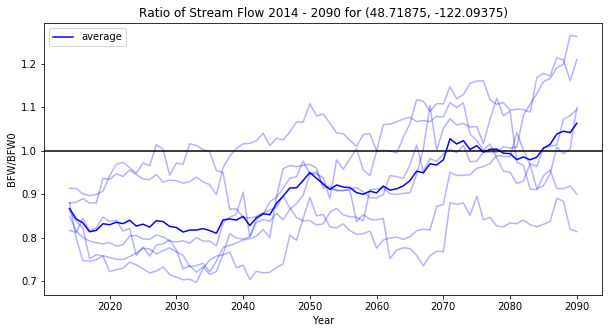

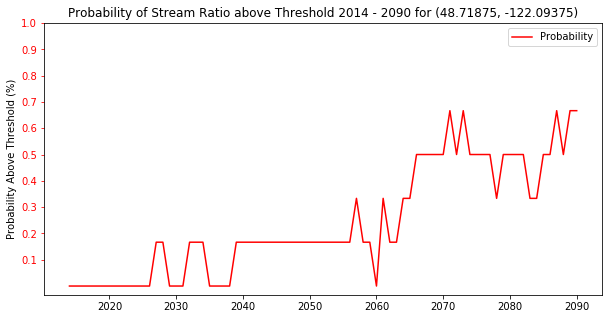

In [377]:
plot_fivepctls(fivepctldf, votepctl, startyear, endyear, thresh, coord)

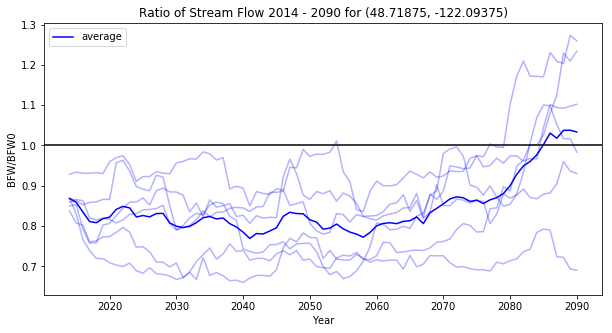

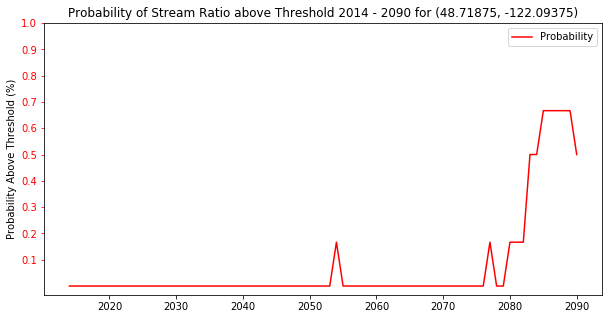

In [380]:

coord='(48.71875, -122.09375)'
startyear=2013
endyear=2090
thresh=1
paths=dfpathsB1

make_plot(coord, startyear, endyear, thresh, paths)

In [309]:
dfsource=pd.read_csv('reference_csv/ccsm3_A1B.csv')

In [382]:
cols=dfsource.columns

In [392]:
coordlist=pd.DataFrame(cols)

In [393]:
coordlist 
#find diagonal coordinates 

,0
0,wateryear
1,"(45.03125, -124.65625)"
2,"(45.03125, -124.59375)"
3,"(45.03125, -124.53125)"
4,"(45.03125, -124.46875)"
5,"(45.03125, -124.40625)"
6,"(45.03125, -124.34375)"
7,"(45.03125, -124.28125)"
8,"(45.03125, -124.21875)"
9,"(45.03125, -124.15625)"


In [ ]:
coordlist.to_csv('allcoordinates.csv')

In [739]:
lowdf=gev_samples_allyears(startyear=2020, coord='(48.71875, -122.09375)', endyear=2099, dfsource=dfexample)

In [730]:
make_gev(dataarray, pctl)

469.04809389146425

In [733]:
dataarray1=get_extreme_values(year=2017, coord='(48.71875, -122.09375)', dfsource=dfexample)
make_gev(dataarray1, pctl)

441.95518193848727

In [740]:
lowdf.head(2)

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,385.000615,417.994715,436.271703,446.040871,477.389500,416.969386,425.112145,380.824898,454.153478,450.714069,...,407.414298,457.169989,443.028264,462.966723,466.451376,485.663364,544.942137,490.143486,527.766550,456.740049
1,390.350753,410.481084,382.578168,428.083135,421.895354,475.408226,378.143194,451.430897,432.988684,456.850569,...,416.172862,383.309920,537.735565,499.106514,416.247357,524.838839,453.771328,505.586759,403.405605,458.466197


In [741]:
ratiodf=make_ratios(lowdf)

ratiodfbeta=ratiodf**.5

In [742]:
ratiodf[:3]

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,1.085699,1.133171,1.158546,1.239971,1.083036,1.104186,0.989154,1.179618,1.170684,1.030298,...,1.058217,1.187453,1.150721,1.202509,1.211560,1.261461,1.415432,1.273098,1.370820,1.186336
1,1.051570,0.980088,1.096663,1.080811,1.217900,0.968727,1.156475,1.109230,1.170359,0.987800,...,1.066151,0.981963,1.377570,1.278610,1.066342,1.344531,1.162471,1.295211,1.033444,1.174498
2,1.035137,0.959020,0.956779,0.951840,1.005027,0.978149,0.879599,0.915687,1.050578,0.874313,...,0.913664,0.964960,1.087790,1.120613,1.270146,1.000053,1.043378,1.106202,1.079561,0.874040


In [743]:
quantilebetadf=find_percentiles(ratiodfbeta)

In [744]:
quantiledf=find_percentiles(ratiodf)


In [915]:
quantiledf.iloc[:,:20]

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0.05,0.859578,0.860035,0.879676,0.876013,0.877025,0.870076,0.872178,0.872116,0.863776,0.872974,0.865449,0.877619,0.880338,0.881638,0.860613,0.860555,0.911575,0.929652,0.940694,0.999703
0.95,1.144779,1.131923,1.165892,1.188283,1.199332,1.192474,1.183380,1.170710,1.167622,1.166307,1.167709,1.173261,1.185771,1.156239,1.151875,1.149298,1.201630,1.224384,1.255599,1.297353


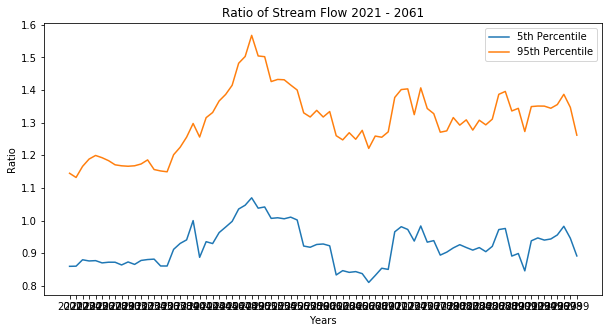

In [916]:
plot_dist_quantiles(quantiledf.columns[0], quantiledf.columns[40], quantiledf.iloc[:40])

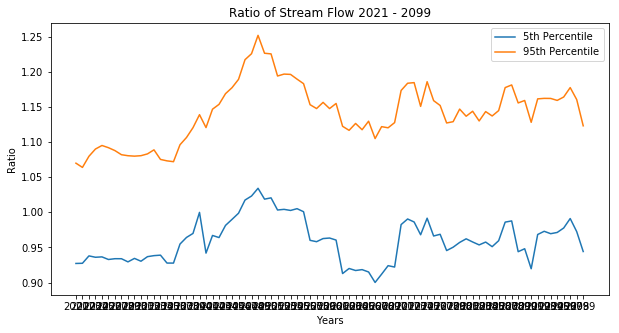

In [747]:
plot_dist_quantiles(quantilebetadf.columns[0], quantilebetadf.columns[-1], quantilebetadf)

In [673]:
import folium



ModuleNotFoundError: No module named 'folium'

In [527]:
locationparams=pd.read_csv('VIC_Castro_Regions.csv')
locationparams.columns=['Lattitude', 'Longitude', 'Region']

In [571]:
locationparams.head(2)

coord='(48.71875, -122.09375)'

beta, TBFW=find_beta_TBFW(coord, locationparams)

In [572]:
find_quantile(TBFW)

0.16666666666666663

In [ ]:
df=pd.DataFrame(coorddict, index=coordlist)
df.head(4)

In [ ]:
group.variables['TIME']
#number of base flows divided by lat and lon pairs
#not apparent how it is organized 

In [1]:
data_hashes=[]

In [2]:
def dl_one_netcdf(baselink, link):
    #takes the baselink (refers to the model)
    #takes link (refers to the month)
    #returns the NetCDF  dataset to start parsing

    response = requests.get(baselink+link)
    #write binary for 'wb'
    with open("placeholder.nc", "wb") as f:
    #     import pdb; pdb.set_trace()
        data = response.content
        f.write(data)
    group = Dataset("placeholder.nc")
    return group

In [39]:
import requests
import boto3

s3=boto3.client("s3")
baselink="http://warm.atmos.washington.edu/2860/r7climate/hb2860_transient_runs/ccsm3_A1B/netcdf_daily/"

def retrieveurls(baselink):
    response = requests.get(baselink)
    soup=BeautifulSoup(response.text, "html.parser")
    links=soup.find_all('a')
    #Note the [5:] is specific for the baselink
    #if using for another baselink, check manually the parse [5:]
    linklist=[datedlink for datedlink in [l['href'] for l in links][5:] if int(datedlink[32:38])>=198510]
    return linklist

def makelink(baselink, link):
    return baselink+link

def fetch_data(url):
    """Fetch data from a URL, raise exception if status code not 200"""
    response = requests.get(url)
    if response.status_code != 200:
        raise IOError("Unable to fetch data, status code " +
                      str(response.status_code) + ": " +
                      response.content.decode())
    return response.content


def fetch_netcdf(baselink, link):
    """Fetch NetCDF data from URL and return Dataset."""
    url=makelink(baselink, link)
    data = fetch_data(url)    
    s3.put_object(Bucket='uwdatabasefiles',
             Key=link,
             Body=data)
    
def fetch_all_files(baselink):
    linklist=retrieveurls(baselink)
    for link in linklist[:2]:
        fetch_netcdf(baselink, link)
    


In [23]:
#convert to json
import requests
import boto3
import requests
from bs4 import BeautifulSoup

baselink="http://warm.atmos.washington.edu/2860/r7climate/hb2860_transient_runs/ccsm3_A1B/netcdf_daily/"

def retrieveurls(baselink):
    response = requests.get(baselink)
    soup=BeautifulSoup(response.text, "html.parser")
    links=soup.find_all('a')
    #Note the [5:] is specific for the baselink
    #if using for another baselink, check manually the parse [5:]
    linklist=[datedlink for datedlink in [l['href'] for l in links][5:] if int(datedlink[32:38])>=198510]
    return linklist

def convert_to_json(link):
    s3=boto3.client("s3")
    response = s3.get_object(Bucket='uwdatabasefiles',
                             Key=link)
    with open("placeholder.json", "w") as f:
        data = response.content
        f.write(data)
        s3.put_object(Bucket='uwdatabasefiles',
             Key=link.json,
             Body=data)



In [25]:
s3=boto3.client("s3")
response = s3.get_object(Bucket='uwdatabasefiles',
                             Key='hb2860_transient_runs.ccsm3_A1B.198510.nc')


In [46]:
response=s3.download_file(Bucket='uwmodelfiles',
                         Key='ccsm3_A1B/hb2860_transient_runs.ccsm3_A1B.nc',
                         Filename='placeholder.nc')

In [47]:
group=Dataset('placeholder.nc')

In [68]:
len(group.variables['BASEFLOW'])

54787

In [59]:
key='ccsm3_A1B/hb2860_transient_runs.ccsm3_A1B.nc'

In [69]:

df.to_csv('reference_csv/ccsm2_A1B.csv')

In [76]:
for file in linklist[:3]:
    print('aws s3 cp s3://uwdatabasefiles/{} ~/bucketdatabase/{}'.format(file, file))
    

aws s3 cp s3://uwdatabasefiles/hb2860_transient_runs.ccsm3_A1B.198510.nc ~/bucketdatabase/hb2860_transient_runs.ccsm3_A1B.198510.nc
aws s3 cp s3://uwdatabasefiles/hb2860_transient_runs.ccsm3_A1B.198511.nc ~/bucketdatabase/hb2860_transient_runs.ccsm3_A1B.198511.nc
aws s3 cp s3://uwdatabasefiles/hb2860_transient_runs.ccsm3_A1B.198512.nc ~/bucketdatabase/hb2860_transient_runs.ccsm3_A1B.198512.nc


In [48]:
g=Dataset('Database files/hb2860_transient_runs.ccsm3_A1B.198510 (2).nc' )

In [51]:
g.variables['BASEFLOW'][1]

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 1e+20)

In [1196]:
data_hashes

[-8799312884442972279, -8799312884442972279]

In [1159]:
url=baselink+linklist[0]
url1=makelink(baselink, linklist[1])

In [1167]:
f1=fetch_netcdf(url)

In [77]:
d

NameError: name 'df' is not defined

In [1134]:
file = fetch_netcdf(url1)

In [1135]:
clist=makecoordlist(group)
tlist=maketimelist(group)

In [1071]:
group.variables['BASEFLOW'].shape

(31, 187, 239)

In [1003]:
len(list(data.variables['BASEFLOW']))

31

In [1001]:
data.variables['TIME'][:].shape

(31,)

In [1061]:
linklist=retrieveurls('http://warm.atmos.washington.edu/2860/r7climate/hb2860_transient_runs/ccsm3_A1B/netcdf_daily/')

In [814]:
linklist[10]

'hb2860_transient_runs.ccsm3_A1B.198608.nc'

In [1082]:
baselink='http://warm.atmos.washington.edu/2860/r7climate/hb2860_transient_runs/ccsm3_A1B/netcdf_daily/'
group1=dl_one_netcdf(baselink, linklist[10])


In [1087]:
group1.variables['BASEFLOW']

RuntimeError: NetCDF: HDF error

In [792]:
clist=makecoordlist(group)
tlist=maketimelist(group)

In [823]:
#group1.variables['BASEFLOW'][1]
group2=Dataset('placeholder.nc')
group2.variables['BASEFLOW'][0]
#baseflowdf=makedfbaseflow(group1, clist,tlist)

RuntimeError: NetCDF: HDF error

In [794]:
group1.variables['BASEFLOW'][10]


RuntimeError: NetCDF: HDF error

In [795]:
linklist[10]

'hb2860_transient_runs.ccsm3_A1B.198608.nc'

In [816]:
group=Dataset('Database files/hb2860_transient_runs.ccsm3_A1B.198608.nc')

In [818]:
l=group.variables['BASEFLOW'][10]

In [820]:
l[10]

masked_array(data = [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- 0.17578125 0.193359375 0.220703125 0.1982421875
 0.201171875 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- 0.181640625 0.1220703125 0.1025390625
 0.09765625 0.0830078125 0.0830078125 0.083984375 0.0830078125 0.083984375
 0.0830078125 0.0830078125 0.0830078125 0.0830078125 0.0830078125
 0.11328125 0.1171875 0.111328125 0.11328125 0.14453125 0.11328125 0.109375
 0.1181640625 0.1337890625 0.1103515625 0.111328125 0.111328125 0.048828125
 0.0947265625 0.169921875 0.2080078125 0.20703125 0.173828125 0.150390625
 0.1123046875 0.1103515625 0.109375 0.1103515625 0.109375 0.109375
 0.1123046875 0.1142578125 0.111328125 0.1103515625 0.1103515625
 0.1103515625 -- 0.134765625 0.2021

In [78]:
(.168 * .832 / 595)**.5

0.01532702342461913

In [79]:
1-.832


0.16800000000000004